# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f'Shape of the data: {df_data.shape}')
print(f'The data consists of {df_data.shape[0]} rows and {df_data.shape[1]} columns')
print(f"All the column names are {df_data.columns}")

Shape of the data: (4324, 9)
The data consists of 4324 rows and 9 columns
All the column names are Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [ ]:
print(f"Is there duplicated value: {df_data.duplicated().values.any()}")
print(f"Number of duplicated value: {df_data.duplicated().values.sum()}")

print(f"Is there NaN value: {df_data.isna().values.any()}")
print(f"Number of NaN value: {df_data.isna().values.sum()}")



Is there duplicated value: False
Number of duplicated value: 0
Is there NaN value: True
Number of NaN value: 3360


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
print(f'Missing values for mission_launches?: {df_data.isna().values.any()}')
df_data.isna().sum()

Missing values for mission_launches?: True


Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [ ]:
print('As you can see most of missing values are from price that is not gonna be matter to most of analysis part')
print('If we drop all na. 80% of the data will be gone.')

As you can see most of missing values are from price that is not gonna be matter to most of analysis part
If we drop all na. 80% of the data will be gone.


## Descriptive Statistics

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
count_organisations = df_data.Organisation.value_counts()
count_organisations

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [ ]:
a_bar = px.bar(y=count_organisations.index,
               x=count_organisations.values,
               color=count_organisations.values,
               color_continuous_scale='speed',
               orientation='h',
               title='Number of Launches per Company')

a_bar.update_layout(xaxis_title='Number of Launches', 
                            yaxis_title='Company')
a_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
status = df_data.Rocket_Status.value_counts()
status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [ ]:
b_bar = px.bar(
        x = status.index,
        y = status.values,
        color = status.values,
        color_continuous_scale='jet',
        title='Number of Active versus Retired Rockets')

b_bar.update_layout(xaxis_title='Status', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Missions')
b_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
concl = df_data.Mission_Status.value_counts()
concl

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
c_bar = px.bar(
        x = concl.index,
        y = concl.values,
        color = concl.values,
        color_continuous_scale='inferno',
        title='Number of Mission Status')

c_bar.update_layout(xaxis_title='Status', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Missions')
c_bar.show()

fig = px.pie(labels=concl.index, 
             values=concl.values,
             title="Number of Mission Status",
             names=concl.index,
             )

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
price = df_data.Price.value_counts()
price

450.0      136
200.0       75
40.0        55
62.0        41
30.8        38
109.0       37
50.0        34
64.68       34
29.75       33
90.0        32
41.8        31
48.5        26
29.15       25
31.0        22
29.0        22
59.0        22
69.7        17
21.0        16
65.0        16
35.0        16
56.5        15
37.0        15
164.0       15
7.5         14
1,160.0     13
47.0        13
25.0        12
350.0       11
153.0       11
45.0        10
112.5        9
5.3          9
123.0        8
145.0        7
85.0         7
120.0        7
80.0         7
115.0        6
59.5         5
7.0          5
46.0         5
136.6        4
63.23        4
140.0        3
133.0        3
190.0        3
130.0        3
135.0        2
5,000.0      2
39.0         2
55.0         1
15.0         1
20.14        1
20.0         1
12.0         1
28.3         1
Name: Price, dtype: int64

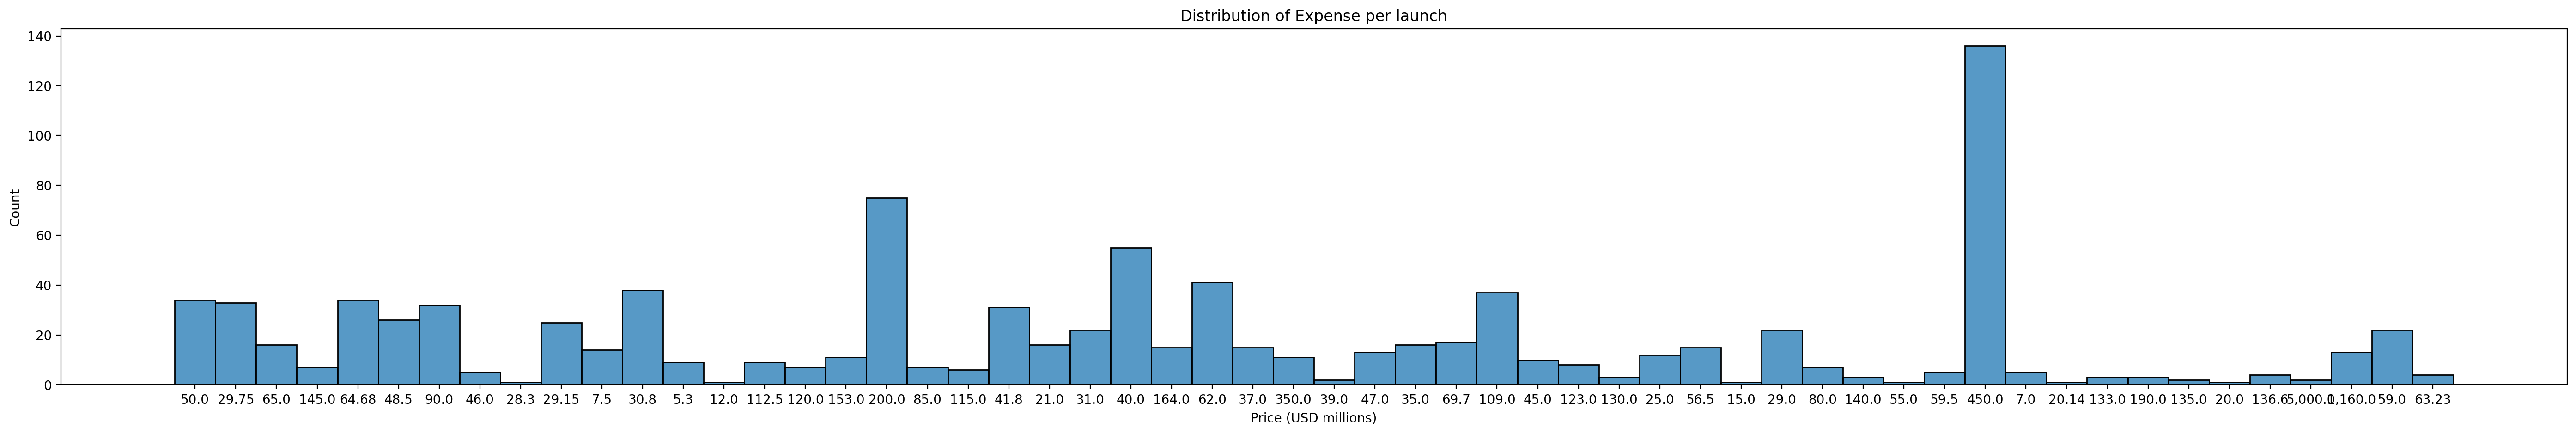

In [ ]:
plt.figure(figsize=(35, 5), dpi=200)
sns.histplot(data=df_data,
             x=df_data.Price,
             bins=30)
plt.xlabel('Price (USD millions)')
plt.title('Distribution of Expense per launch')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
country = df_data.Location.value_counts()
country

Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: Location, Length: 137, dtype: int64

In [ ]:
df_data.at[1,'Location']

'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China'

In [ ]:
for a in df_data.index :
    b = int(a)
    i = df_data.Location[b]
    x = i.split(',')
    x = x[len(x)-1].strip()
    if x == "Russia": df_data.at[b,'Location']=countries.get('Russian Federation').alpha3    #print(countries.get('Russian Federation').alpha3)
    elif x == "New Mexico": df_data.at[b,'Location']=countries.get('USA').alpha3                                    #print(countries.get('USA').alpha3)
    elif x == "Yellow Sea": df_data.at[b,'Location']=countries.get('China').alpha3                                  #print(countries.get('China').alpha3)
    elif x == "Shahrud Missile Test Site": df_data.at[b,'Location']='IRN'                   #print(countries.get('Iran').alpha3)
    elif x == "Pacific Missile Range Facility": df_data.at[b,'Location']=countries.get('USA').alpha3                #print(countries.get('USA').alpha3)
    elif x == "Barents Sea": df_data.at[b,'Location']=countries.get('Russian Federation').alpha3                    #print(countries.get('Russian Federation').alpha3)
    elif x == "Gran Canaria": df_data.at[b,'Location']=countries.get('USA').alpha3                                  #print(countries.get('USA').alpha3)       
    elif x == "Iran": df_data.at[b,'Location']='IRN' 
    elif x == "North Korea": df_data.at[b,'Location']='PRK'         
    elif x == "Pacific Ocean": df_data.at[b,'Location']='USA'    
    elif x == "South Korea": df_data.at[b,'Location']='KOR'              
    else:
      df_data.at[b,'Location']=countries.get(x).alpha3
      
       #print(countries.get(x).alpha3)


# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
lvf = df_data[df_data.Mission_Status=='Failure']
lvf_tot = lvf.groupby(['Location'], 
                                  as_index=False).agg({'Mission_Status': pd.Series.count})
lvf_tot 

,Location,Mission_Status
0,AUS,3
1,BRA,2
2,CHN,19
3,FRA,13
4,IND,8
5,IRN,8
6,ISR,2
7,JPN,10
8,KAZ,72
9,KOR,2


In [ ]:
lvf_map = px.choropleth(lvf_tot,
                          locations='Location',
                          color='Mission_Status', 
                          hover_name='Location', 
                          color_continuous_scale=px.colors.sequential.matter)

lvf_map.update_layout(coloraxis_showscale=True,)

lvf_map.show()                

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
com = df_data.groupby(by=['Location', 
                          'Organisation',
                           'Mission_Status'],as_index=False).agg({'Mission_Status': pd.Series.count})

com_data = com.sort_values('Mission_Status', ascending=False)
com_data

,Location,Organisation,Mission_Status
81,RUS,RVSN USSR,1119
58,KAZ,RVSN USSR,495
19,FRA,Arianespace,267
9,CHN,CASC,231
103,USA,General Dynamics,203
...,...,...,...
77,RUS,MITT,1
82,RUS,Roscosmos,1
84,RUS,SRC,1
89,RUS,Yuzhmash,1


In [ ]:
burst1 = px.sunburst(com_data, 
                    path=['Location', 'Organisation','Mission_Status'], 
                    values='Mission_Status',
                    title='Mission Status',
                   )

burst1.update_layout(xaxis_title='Mission_Status', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)

burst1.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
pom = df_data.groupby(by=['Organisation',
                         'Mission_Status'],as_index=False).agg({'Price': pd.Series.count})

pom = pom.sort_values('Price', ascending=False)
pom

,Organisation,Mission_Status,Price
17,CASC,Success,152
76,NASA,Success,146
104,ULA,Success,97
8,Arianespace,Success,93
101,SpaceX,Success,93
...,...,...,...
44,ISA,Prelaunch Failure,0
43,ISA,Failure,0
42,IRGC,Success,0
40,ILS,Partial Failure,0


In [ ]:
burst2 = px.sunburst(pom, 
                    path=['Organisation','Mission_Status'], 
                    values='Price',
                    title='Organisations Expense',
                   )

burst2.update_layout(xaxis_title='Price', 
                    yaxis_title='Mission_Status',
                    coloraxis_showscale=False)

burst2.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
pol = df_data.groupby(by=['Organisation',
                         'Price'],as_index=False).agg({'Unnamed: 0': pd.Series.count})

pol = pol.sort_values('Unnamed: 0', ascending=False)
pol

,Organisation,Price,Unnamed: 0
40,NASA,450.0,136
1,Arianespace,200.0,75
41,Northrop,40.0,55
11,CASC,30.8,38
56,SpaceX,62.0,37
...,...,...,...
22,ILS,130.0,1
24,ILS,153.0,1
32,JAXA,90.0,1
44,Northrop,55.0,1


In [ ]:
burst3 = px.sunburst(pol, 
                    path=['Organisation','Price'], 
                    values='Unnamed: 0',
                    title='Organisations Expense',
                   )

burst3.update_layout(xaxis_title='Number of Launch', 
                    yaxis_title='Price',
                    coloraxis_showscale=False)

burst3.show()

In [ ]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,USA,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,CHN,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,USA,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,KAZ,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,USA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,USA,"Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,USA,"Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,USA,"Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,KAZ,"Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Chart the Number of Launches per Year

In [ ]:
df_data.Date = pd.to_datetime(df_data.Date)
df_data['date'] = [d.date() for d in df_data['Date']]
df_data['time'] = [d.time() for d in df_data['Date']]
df_data['year'] = pd.DatetimeIndex(df_data['date']).year
df_data['month'] = pd.DatetimeIndex(df_data['date']).month

In [ ]:
lpy = df_data.groupby(by=['year'
                         ],as_index=True).agg({'Mission_Status': pd.Series.count})

lpy

,Mission_Status
year,
1957,3
1958,28
1959,20
1960,39
1961,52
...,...
2016,90
2017,92
2018,117


In [ ]:
e_bar = px.bar(
        x = lpy.index,
        y = lpy.Mission_Status,
        color = lpy.Mission_Status,
        color_continuous_scale='inferno',
        title='Number of Mission Status')

e_bar.update_layout(xaxis_title='Year', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Launch')
e_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
df_data['year-month'] = pd.DatetimeIndex(df_data['date']).strftime('%Y-%m')
#df_data['year-month']

In [ ]:
#lpm = df_data.groupby(by=['year-month'
#                         ],as_index=True).agg({'Mission_Status': pd.Series.count})
#
#lpm
lpm = df_data.groupby(by='year-month').count().Mission_Status
moving_average = lpm.rolling(window=5).mean()
lpm

year-month
1957-10     1
1957-11     1
1957-12     1
1958-02     2
1958-03     3
           ..
2020-04     5
2020-05     9
2020-06     7
2020-07    14
2020-08     3
Name: Mission_Status, Length: 747, dtype: int64

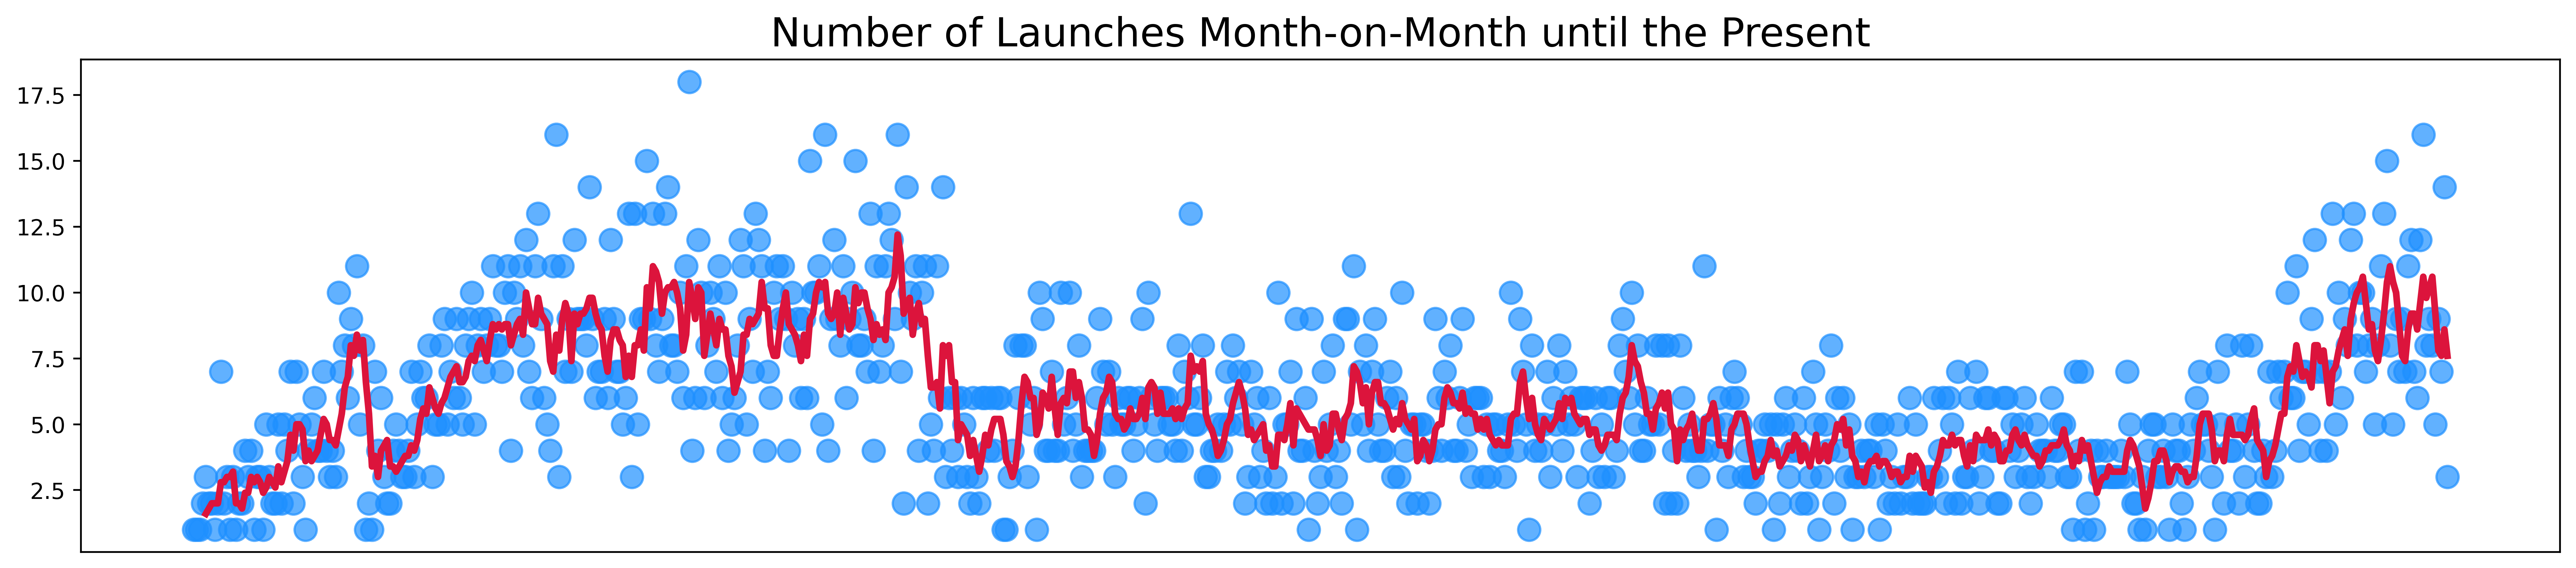

In [ ]:
plt.figure(figsize=(20,4), dpi=500)
plt.title('Number of Launches Month-on-Month until the Present', fontsize=18)
plt.xticks(ticks=np.arange(1960, 2025, step=10), fontsize=14, 
           rotation=45
           )
plt.scatter(x=lpm.index, 
           y=lpm.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

plt.plot(lpm.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
lpm2 = df_data.groupby(by=['month'
                         ],as_index=True).agg({'Mission_Status': pd.Series.count})

lpm2

,Mission_Status
month,
1,268
2,336
3,353
4,383
5,326
6,402
7,351
8,373
9,365


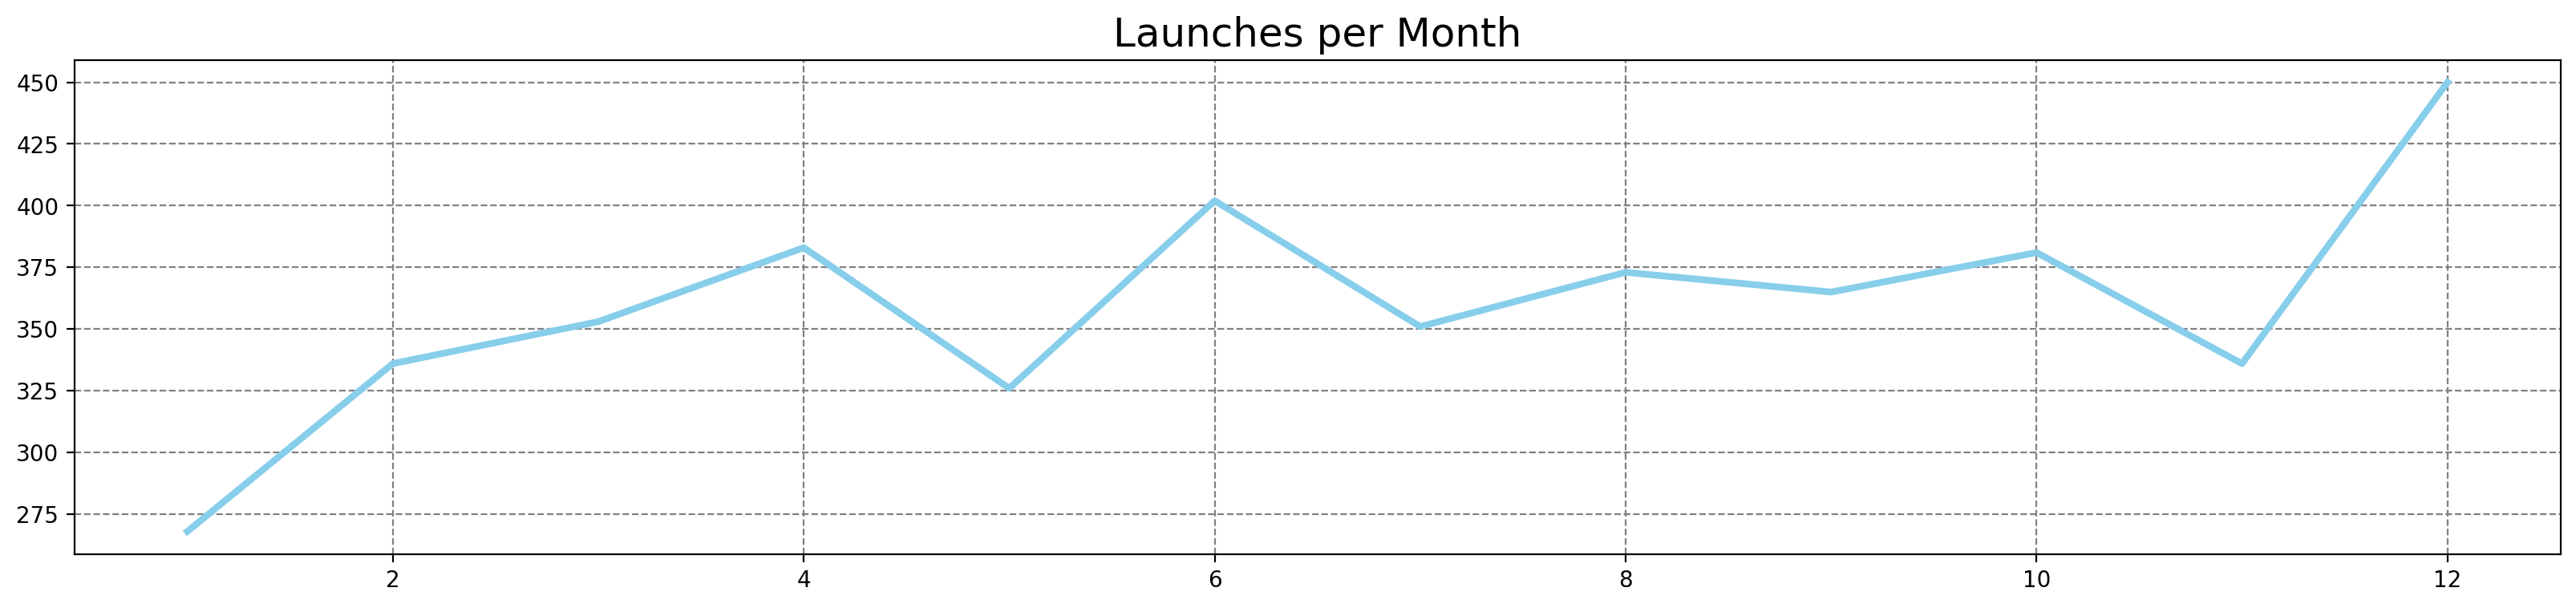

In [ ]:
plt.figure(figsize=(20,4), dpi=200)
plt.title('Launches per Month', fontsize=18)

ax = plt.gca()
ax.grid(color='grey', linestyle='--')

ax.plot(lpm2.index, 
         lpm2.Mission_Status, 
         color='skyblue', 
         linewidth=3)

plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

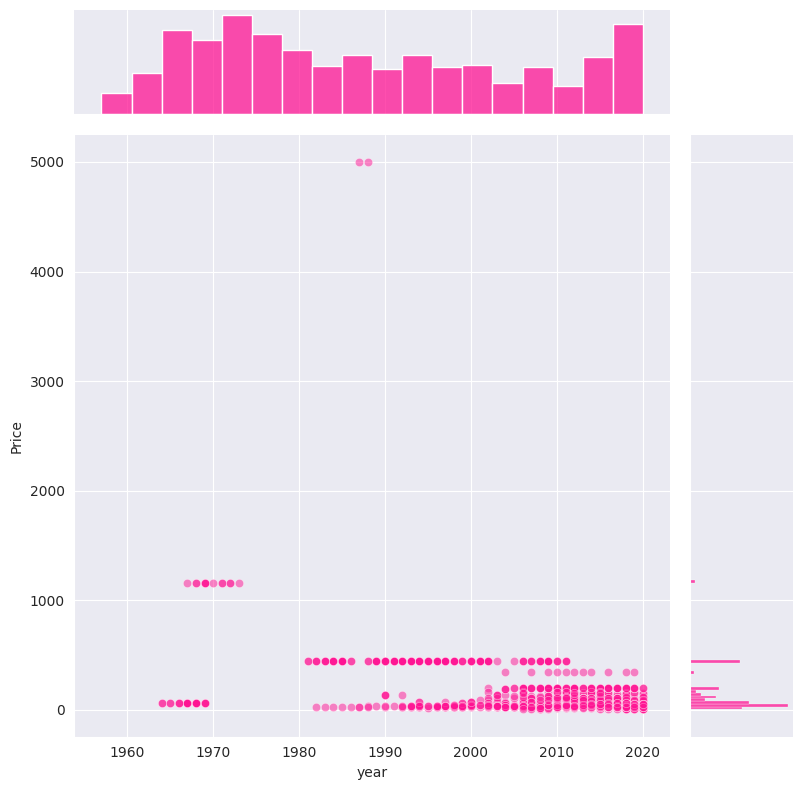

In [ ]:
sa = pd.to_numeric(df_data['Price'].str.replace(',',''))
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_data['year'], 
                y=sa, 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

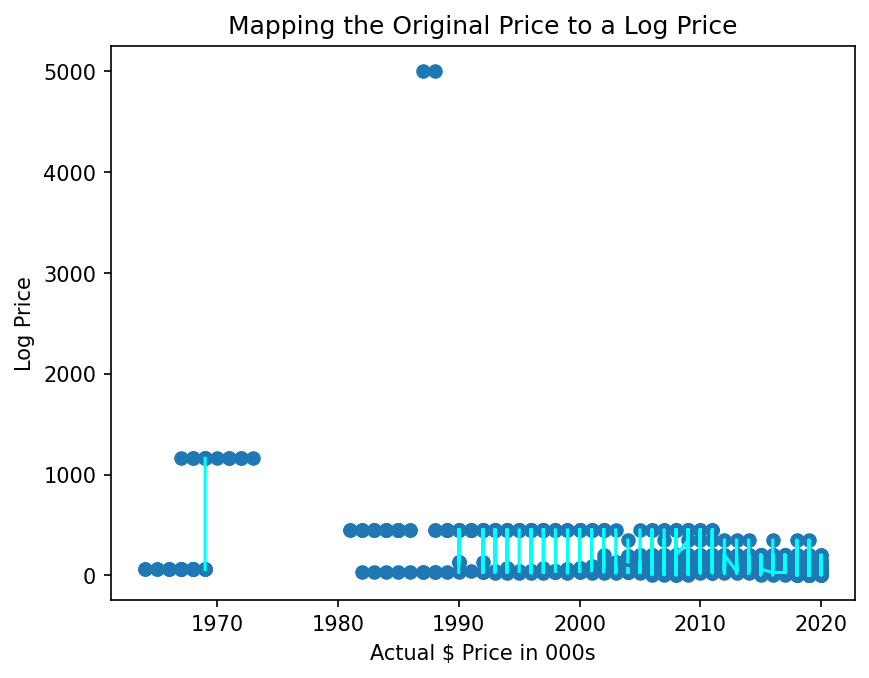

In [ ]:

plt.figure(dpi=150)
plt.scatter(df_data.year, sa)
plt.plot(df_data.year, sa, color='cyan')
plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
lot = df_data.groupby(['Organisation', 'year'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
lot.sort_values(by='Mission_Status', ascending=False, inplace=True)
lot

,Organisation,year,Mission_Status
517,RVSN USSR,1977,97
516,RVSN USSR,1976,95
511,RVSN USSR,1971,93
515,RVSN USSR,1975,89
510,RVSN USSR,1970,87
...,...,...,...
292,JAXA,2013,1
278,ISRO,2006,1
277,ISRO,2005,1
276,ISRO,2004,1


In [ ]:
top = df_data.groupby(['Organisation'], 
                        as_index=False).agg({'Mission_Status': pd.Series.count})

top.sort_values(by='Mission_Status', inplace=True)
top10 = top[-10:]
top10

,Organisation,Mission_Status
34,Martin Marietta,114
6,Boeing,136
48,ULA,140
49,US Air Force,161
52,VKS RF,201
35,NASA,203
7,CASC,251
17,General Dynamics,251
3,Arianespace,279
40,RVSN USSR,1777


In [ ]:
merged_10 = pd.merge(lot, top10, on='Organisation')
# change column names
merged_10.columns = ['Organisation', 'year', 'Mission_count', 'total_count'] 
merged_10.sort_values(by='total_count', inplace=True)
merged_10

,Organisation,year,Mission_count,total_count
322,Martin Marietta,1986,1,114
293,Martin Marietta,1978,7,114
294,Martin Marietta,1976,7,114
295,Martin Marietta,1975,7,114
296,Martin Marietta,1984,6,114
...,...,...,...,...
23,RVSN USSR,1988,36,1777
22,RVSN USSR,1990,37,1777
21,RVSN USSR,1980,40,1777
19,RVSN USSR,1984,42,1777


In [ ]:
lotbo = px.bar(x=merged_10.Mission_count,
               y=merged_10.Organisation,
               color=merged_10.year,
               orientation='h',
               title='Top 10 Organisations by Number of Launches over Time')

lotbo.update_layout(xaxis_title='Number of Launch', 
                            yaxis_title='Organisations')
lotbo.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
usa_cw=df_data[df_data.Location=='USA']
rus_cw=df_data[df_data.Location=='RUS']
kaz_cw=df_data[df_data.Location=='KAZ']
for i in kaz_cw.index:
  a = int(i)
  kaz_cw.at[a,'Location']="RUS"

cwsr = pd.concat([usa_cw,rus_cw,kaz_cw])
cwsr = cwsr[cwsr.year<1992]
cwsr

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,date,time,year,month,year-month
1721,1721,1721,General Dynamics,USA,1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,1991-12-07,22:47:00,1991,12,1991-12
1722,1722,1722,General Dynamics,USA,1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,1991-11-28,13:23:00,1991,11,1991-11
1724,1724,1724,NASA,USA,1991-11-24 23:44:00+00:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.0,Success,1991-11-24,23:44:00,1991,11,1991-11
1726,1726,1726,Martin Marietta,USA,1991-11-08 07:07:00+00:00,Titan IV(403)A | SLDCOM & NOSS 3x,StatusRetired,NaN,Success,1991-11-08,07:07:00,1991,11,1991-11
1732,1732,1732,NASA,USA,1991-09-12 23:11:00+00:00,Space Shuttle Discovery | STS-48,StatusRetired,450.0,Success,1991-09-12,23:11:00,1991,9,1991-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301,4301,4301,RVSN USSR,RUS,1958-09-23 07:40:00+00:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,1958-09-23,07:40:00,1958,9,1958-09
4313,4313,4313,RVSN USSR,RUS,1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,1958-05-15,07:12:00,1958,5,1958-05
4315,4315,4315,RVSN USSR,RUS,1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958-04-27,09:01:00,1958,4,1958-04
4322,4322,4322,RVSN USSR,RUS,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03,02:30:00,1957,11,1957-11


In [ ]:
cwsr_count = cwsr.Location.value_counts()
cwsr_count

RUS    1770
USA     662
Name: Location, dtype: int64

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
fig = px.pie(labels=cwsr_count.index, 
             values=cwsr_count.values,
             title="total number of launches of the USSR and the USA",
             names=cwsr_count.index,
             )

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

f_bar = px.bar(
        x = cwsr_count.index,
        y = cwsr_count.values,
        color = cwsr_count.values,
        color_continuous_scale='inferno',
        title='total number of launches of the USSR and the USA')

f_bar.update_layout(xaxis_title='Status', 
                    coloraxis_showscale=False,
                    yaxis_title='number of launches')
f_bar.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
yoynl = cwsr.groupby(['year', 'Location'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
yoynl.sort_values('Mission_Status', ascending=False, inplace=False)
yoynl

,year,Location,Mission_Status
0,1957,RUS,2
1,1957,USA,1
2,1958,RUS,5
3,1958,USA,23
4,1959,RUS,4
...,...,...,...
65,1989,USA,16
66,1990,RUS,37
67,1990,USA,26
68,1991,RUS,29


In [ ]:
g_bar_split = px.bar(x = yoynl.year,
                     y = yoynl.Mission_Status,
                     color = yoynl.Location,
                     title='Total Number of Launches Year-On-Year by the Two Superpowers')

g_bar_split.update_layout(xaxis_title='Year', 
                          yaxis_title='Number of Launches')
g_bar_split.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
yoyf = cwsr[cwsr.Mission_Status=='Failure']
new_yoyf = yoyf.groupby(['year', 'Location'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
new_yoyf.sort_values('Mission_Status', ascending=False, inplace=False)
new_yoyf

,year,Location,Mission_Status
0,1957,USA,1
1,1958,RUS,4
2,1958,USA,16
3,1959,RUS,1
4,1959,USA,8
5,1960,RUS,6
6,1960,USA,14
7,1961,RUS,4
8,1961,USA,13
9,1962,RUS,7


In [ ]:
h_bar_split = px.bar(x = new_yoyf.year,
                     y = new_yoyf.Mission_Status,
                     color = new_yoyf.Location,
                     title='Total Number of Mission Failures Year on Year')

h_bar_split.update_layout(xaxis_title='Year', 
                          yaxis_title='Number of Failures')
h_bar_split.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
pft = cwsr[cwsr.Mission_Status=='Failure']
new_pft = pft.groupby(['year'], 
                               as_index=True).agg({'Mission_Status': pd.Series.count})
new_pft.sort_values('Mission_Status', ascending=False, inplace=False)
new_pft

,Mission_Status
year,
1957,1
1958,20
1959,9
1960,20
1961,17
1962,15
1963,12
1964,10
1965,11


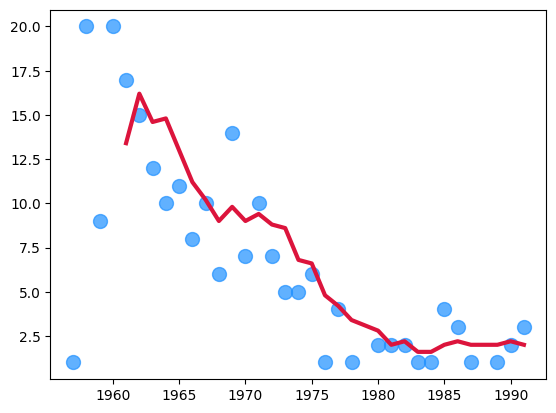

In [ ]:
moving_average = new_pft.rolling(window=5).mean()
plt.scatter(x=new_pft.index, 
           y=new_pft.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

plt.plot(new_pft.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

plt.show()

In [ ]:
i_bar = px.bar(
        x = new_pft.index,
        y = new_pft.Mission_Status,
        color = new_pft.Mission_Status,
        color_continuous_scale='fall',
        title=' Total Number of Mission Failures Year on Year')

i_bar.update_layout(xaxis_title='Status', 
                    coloraxis_showscale=False,
                    yaxis_title='number of Failures')
i_bar.show()

In [ ]:
fig = px.pie(labels= new_pft.index, 
             values= new_pft.Mission_Status,
             title=" Total Percentage of Mission Failures Year on Year",
             names= new_pft.index,
             )

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
print('As you can see the precentages are getting smaller and smaller')

As you can see the precentages are getting smaller and smaller


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
new_data = df_data[df_data.year<2021]
new_data

In [ ]:
toy = new_data.groupby(['year', 'Location'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
toy.sort_values(by='Mission_Status', ascending=False, inplace=True)
toy

In [ ]:
toy1 = toy.drop_duplicates('year')
toy1

In [ ]:
toy_plot = px.bar(x=toy1.Mission_Status,
               y=toy1.year,
               color=toy1.Location,
               orientation='h',
               title='Top Country by Number of Launches each year')

toy_plot.update_layout(xaxis_title='Number of Launch', 
                            yaxis_title='Years')
toy_plot.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
data1 = df_data[df_data.year<1990]
data1 = data1[data1.year>1969]
data1

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,date,time,year,month,year-month
1856,1856,1856,RVSN USSR,RUS,1989-12-27 00:00:00,Tsyklon-3 | Cosmos 2053,StatusRetired,NaN,Success,1989-12-27,00:00:00,1989,12,1989-12
1857,1857,1857,Boeing,USA,1989-12-11 18:10:00+00:00,Delta II 6925 | NAVSTAR II-5,StatusRetired,NaN,Success,1989-12-11,18:10:00,1989,12,1989-12
1858,1858,1858,RVSN USSR,RUS,1989-11-28 10:01:00+00:00,Molniya-M /Block ML | Molniya-3 n†­140,StatusRetired,NaN,Success,1989-11-28,10:01:00,1989,11,1989-11
1859,1859,1859,RVSN USSR,KAZ,1989-11-24 23:22:00+00:00,Tsyklon-2 | Cosmos 2051,StatusRetired,NaN,Success,1989-11-24,23:22:00,1989,11,1989-11
1860,1860,1860,RVSN USSR,RUS,1989-11-23 20:35:00+00:00,Molniya-M /Block 2BL | Cosmos 2050,StatusRetired,NaN,Success,1989-11-23,20:35:00,1989,11,1989-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,3494,3494,RVSN USSR,RUS,1970-01-20 20:20:00+00:00,Cosmos-2I (63SM) | Cosmos 321,StatusRetired,NaN,Success,1970-01-20,20:20:00,1970,1,1970-01
3495,3495,3495,RVSN USSR,RUS,1970-01-16 10:59:00+00:00,Cosmos-2I (63SM) | Cosmos 320,StatusRetired,NaN,Success,1970-01-16,10:59:00,1970,1,1970-01
3496,3496,3496,RVSN USSR,RUS,1970-01-15 13:40:00+00:00,Cosmos-2I (63SM) | Cosmos 319,StatusRetired,NaN,Success,1970-01-15,13:40:00,1970,1,1970-01
3497,3497,3497,US Air Force,USA,1970-01-14 18:43:00+00:00,Titan III(23)B | OPS 6531,StatusRetired,NaN,Success,1970-01-14,18:43:00,1970,1,1970-01


In [ ]:
org_dom = data1.groupby(['year', 'Organisation'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
org_dom.sort_values(by='Mission_Status', ascending=False, inplace=True)
#org_dom
org_dom_drop = org_dom.drop_duplicates('year')
org_dom_drop

,year,Organisation,Mission_Status
68,1977,RVSN USSR,97
61,1976,RVSN USSR,95
22,1971,RVSN USSR,93
54,1975,RVSN USSR,89
9,1970,RVSN USSR,87
37,1973,RVSN USSR,84
44,1974,RVSN USSR,83
30,1972,RVSN USSR,79
75,1978,RVSN USSR,71
107,1982,RVSN USSR,53


In [ ]:
toy_plot = px.bar(x=org_dom_drop.Mission_Status,
               y=org_dom_drop.year,
               color=org_dom_drop.Organisation,
               orientation='h',
               title='Top Organisation by Number of Launches each year(1970-1989')

toy_plot.update_layout(xaxis_title='Number of Launch', 
                            yaxis_title='Years')
toy_plot.show()

In [ ]:
data2 = df_data[df_data.year<2021]
data2 = data2[data2.year>2017]
org_dom2 = data2.groupby(['year', 'Organisation'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
org_dom2.sort_values(by='Mission_Status', ascending=False, inplace=True)
org_dom_drop2 = org_dom2.drop_duplicates('year')
org_dom_drop2

,year,Organisation,Mission_Status
2,2018,CASC,37
18,2019,CASC,27
35,2020,CASC,19


In [ ]:
toy_plot = px.bar(x=org_dom_drop2.Mission_Status,
               y=org_dom_drop2.year,
               color=org_dom_drop2.Organisation,
               orientation='h',
               title='Top Organisation by Number of Launches each year(2018-2020)')

toy_plot.update_layout(xaxis_title='Number of Launch', 
                            yaxis_title='Years')
toy_plot.show()